### 3.	Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations:

        (c)	Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR.


In [15]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
originalImage = cv2.imread("img.jpg", cv2.IMREAD_GRAYSCALE)
originalImage = cv2.resize(originalImage, (512, 512))

### Adding Salt & Pepper Noise

In [17]:
def addSaltPeperNoise(image, saltRatio, pepperRatio):
    noisyImage = image.copy()
    numOfPixels = image.size
    numOfSaltPixels = int(saltRatio * numOfPixels)
    numOfPepperPixels = int(pepperRatio * numOfPixels)

    for i in range(numOfSaltPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 255
    
    for i in range(numOfPepperPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 0

    return noisyImage

### Harmonic Mean Filter

In [18]:
def harmonicMean(image, kernelSize = 2):
    filteredImage  = np.zeros_like(image)
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    # Loop through each pixel in the original image
    for i in range (padSize, image.shape[0] + padSize):
        for j in range(padSize, image.shape[1] + padSize):
            window = paddedImage[i - padSize: i+padSize+1, j - padSize: j+padSize+1] # Extract the local neighborhood (window) around the current pixel

            pixel = 0
            for r in range(window.shape[0]):
                for k in range(window.shape[1]):
                    pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k] # Avoid division by zero by setting 0 if the reciprocal is infinity

            pixel = 0 if pixel == 0 else (kernelSize ** 2 / pixel) # Calculate the final pixel value using the harmonic mean formula

            if pixel > 255:  # Clip the pixel value to the range [0, 255]
                pixel = 255

            filteredImage[i-padSize, j-padSize]= pixel
    return filteredImage

### Geometric Mean Filter

In [19]:
def geoMetricMean(image, kernelSize = 2):
    filteredImage  = np.zeros_like(image)
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    for i in range (padSize, image.shape[0] + padSize):
        for j in range(padSize, image.shape[1] + padSize):
            window = paddedImage[i - padSize: i+padSize+1, j - padSize: j+padSize+1]

            pixel = 1
            # Calculate the product of pixel values in the window
            for r in range(window.shape[0]):
                for k in range(window.shape[1]):
                    pixel = pixel * int(window[r, k])

            pixel = pixel ** (1/(kernelSize ** 2)) # Take the geometric mean by raising the product to the power of (1 / (kernelSize^2))

            if pixel > 255:
                pixel = 255

            filteredImage[i-padSize, j-padSize]= pixel
    return filteredImage

### Check PSNR

In [20]:
def calcPSNR(originalImage, degradedImage):     #Peak Signal-to-Noise Ratio
    mse = np.mean((originalImage - degradedImage) ** 2)     # Mean Squared Error (MSE)
    if mse == 0:
        return np.inf
    maxPixelValue = 255.0
    pnsrValue = 20 * np.log10(maxPixelValue / np.sqrt(mse))
    return round(pnsrValue, 2)

### Plot All Image

C:\Users\ISRAK\AppData\Local\Temp\ipykernel_11040\359434071.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k] # Avoid division by zero by setting 0 if the reciprocal is infinity


Text(0.5, 1.0, 'Geometric Mean filtered Image (PNSR=28.97)')

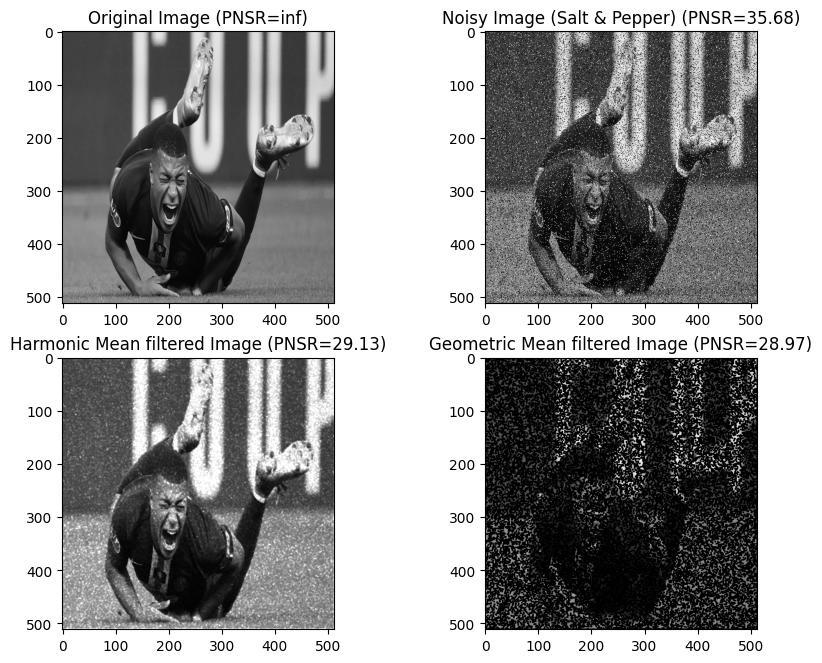

In [21]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPSNR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(3, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={calcPSNR(originalImage, noisyImage)})")

harmonicMeanFilteredImage = harmonicMean(noisyImage, 3)
plt.subplot(3, 2, 3)
plt.imshow(harmonicMeanFilteredImage, cmap='gray')
plt.title(f"Harmonic Mean filtered Image (PNSR={calcPSNR(originalImage, harmonicMeanFilteredImage)})")

geoMetricMeanFilteredImage = geoMetricMean(noisyImage, 3)
plt.subplot(3, 2, 4)
plt.imshow(geoMetricMeanFilteredImage, cmap='gray')
plt.title(f"Geometric Mean filtered Image (PNSR={calcPSNR(originalImage, geoMetricMeanFilteredImage)})")